In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importing data
data = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [4]:
data.head(4)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
data.describe() 

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


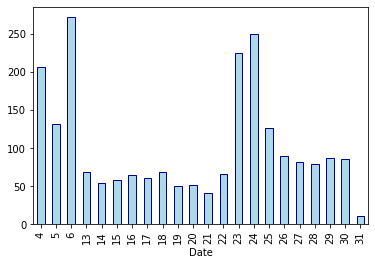

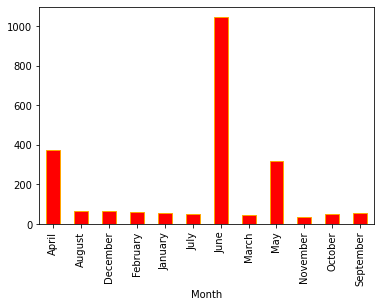

In [7]:
#Trend chart for the number of complaints at monthly and daily granularity levels.

data['Month']=pd.to_datetime(data['Date_month_year']).dt.month_name()
data['Date']=pd.to_datetime(data['Date_month_year']).dt.day

# Graph for date wise
data.groupby(['Date'])['Customer Complaint'].count().plot(kind='bar',color="lightblue",edgecolor="darkblue",)
plt.show()

#Graph for month wise
data.groupby(['Month'])['Customer Complaint'].count().plot(kind='bar',color="red",edgecolor="orange")
plt.show()

In [8]:
# Table with the frequency of complaint types.

data['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Data Caps,11
...,...,...
1836,Complaint#67455,1
1837,Comcast internet-Price keeps changing,1
1838,Complaint about Comcast,1
1839,Contract Cancellation Fees and Unauthorized Ch...,1


In [9]:
#Which complaint types are maximum that is, around internet, network issues, or across any other domains.
data['Customer Complaint'].value_counts().head(5)

Comcast              83
Comcast Internet     18
Comcast Data Cap     17
comcast              13
Comcast Data Caps    11
Name: Customer Complaint, dtype: int64

In [10]:
data["Date_month_year"].value_counts()

24-Jun-15    218
23-Jun-15    190
25-Jun-15     98
26-Jun-15     55
30-Jun-15     53
            ... 
05-Dec-15      7
17-May-15      7
04-May-15      6
05-Mar-15      5
04-Nov-15      5
Name: Date_month_year, Length: 91, dtype: int64

In [27]:
#new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
data["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in data["Status"]]

In [21]:
data.head(4)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,newStatus
0,250635,Comcast Cable Internet Speeds,22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Closed
1,223441,Payment disappear - service got disconnected,4,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,Closed
2,242732,Speed and Service,18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,July,Open


In [13]:
data.tail(6)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,newStatus
2218,338192,"Speed throttling, speeds not at promised output",6,06-Dec-15,6:35:59 PM,Customer Care Call,Yorkville,Illinois,60560,Open,Yes,December,Open
2219,213550,Service Availability,4,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,February,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,6,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,February,Closed
2221,331188,complaint about comcast,6,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,September,Closed
2222,360489,Extremely unsatisfied Comcast customer,23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,June,Closed
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes,June,Open


<AxesSubplot:xlabel='State'>

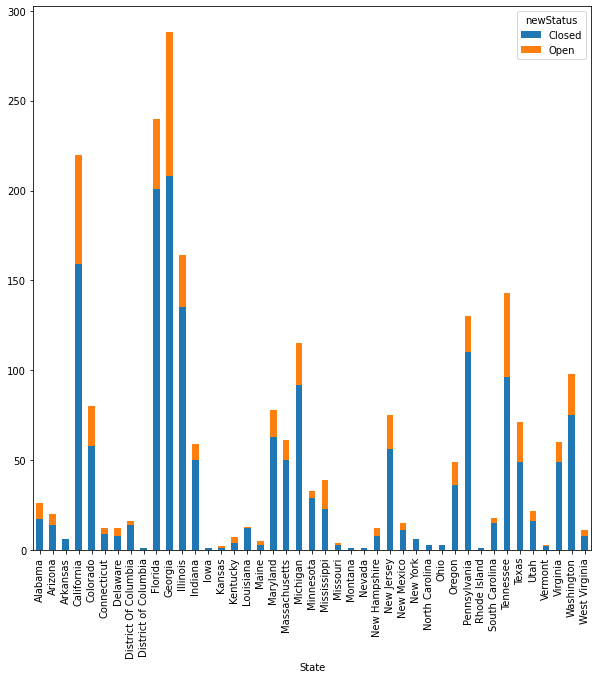

In [25]:
#state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.
Status_complaints.plot(kind="bar", figsize=(10,10), stacked=True)

In [ ]:
#state has the maximum complaints

data.groupby("State")['Customer Complaint'].agg("count").sort_values(ascending=False).head(2)


State
Georgia    288
Florida    240
Name: Customer Complaint, dtype: int64

In [ ]:
#state has the highest percentage of unresolved complaints

State_Unsolved=data.loc[data['Status']=='Open',['State']].value_counts()
State_Unsolved.head(1)/State_Unsolved.sum()*100

State     
California    12.947658
dtype: float64

In [34]:
# The percentage of complaints resolved till date, which were received through the Internet and customer care calls.
data[data['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100

Status  Received Via      
Closed  Customer Care Call    50.615114
        Internet              49.384886
Name: Received Via, dtype: float64

In [19]:
#State wise complaints that are open and closed list 
Status_complaints = data.groupby(["State","newStatus"]).size().unstack().fillna(0)
Status_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


In [28]:
#Which state has the highest percentage of unresolved complaints
data.newStatus.value_counts()

Closed    1707
Open       517
Name: newStatus, dtype: int64

In [31]:
unresolved_data=data.groupby(['State','newStatus']).size().unstack().fillna(0).sort_values(by="Open",ascending=False)
unresolved_data['unresolved_cmp_prct']=unresolved_data['Open']/unresolved_data['Open'].sum()*100
unresolved_data

newStatus,Closed,Open,unresolved_cmp_prct
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743
Michigan,92.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


<AxesSubplot:xlabel='State'>

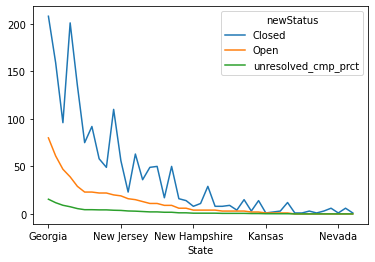

In [32]:
unresolved_data.plot()

In [35]:
resolved_data=data.groupby(['Received Via','newStatus']).size().unstack().fillna(0)
resolved_data['resolved']=resolved_data['Closed']/resolved_data['Closed'].sum()*100
resolved_data['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

<AxesSubplot:xlabel='Received Via'>

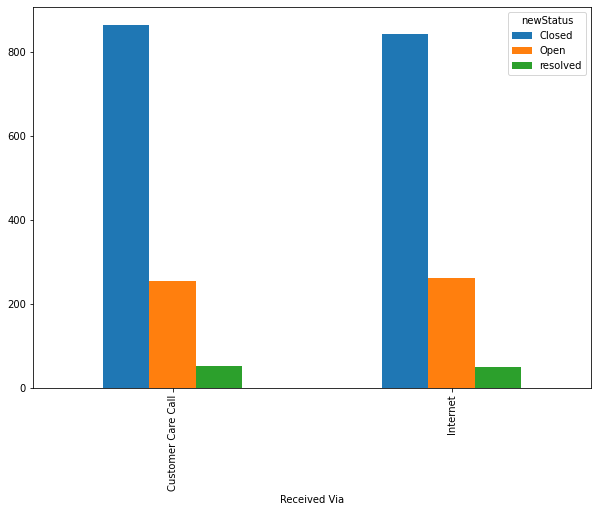

In [36]:
resolved_data.plot(kind='bar',figsize=(10,7))

In [37]:
internet_issues1=data[data['Customer Complaint'].str.contains('network')].count()
internet_issues2=data[data['Customer Complaint'].str.contains('speed')].count()
internet_issues3=data[data['Customer Complaint'].str.contains('data')].count()
internet_issues4=data[data['Customer Complaint'].str.contains('internet')].count()
billing_issues1=data[data['Customer Complaint'].str.contains('billing')].count()
billing_issues2=data[data['Customer Complaint'].str.contains('charges')].count()
service_issues1=data[data['Customer Complaint'].str.contains('service')].count()
service_issues2=data[data['Customer Complaint'].str.contains('customer')].count()
total_internet_issues=internet_issues1+internet_issues2+internet_issues3+internet_issues4
total_billing_issues=billing_issues1+billing_issues2
total_service_issues=service_issues1+service_issues2
other_issues=2224-(total_billing_issues+total_internet_issues+total_service_issues)
other_issues

Ticket #                       1321
Customer Complaint             1321
Date                           1321
Date_month_year                1321
Time                           1321
Received Via                   1321
City                           1321
State                          1321
Zip code                       1321
Status                         1321
Filing on Behalf of Someone    1321
Month                          1321
newStatus                      1321
dtype: int64

In [38]:
total_billing_issues


Ticket #                       169
Customer Complaint             169
Date                           169
Date_month_year                169
Time                           169
Received Via                   169
City                           169
State                          169
Zip code                       169
Status                         169
Filing on Behalf of Someone    169
Month                          169
newStatus                      169
dtype: int64

In [39]:
total_internet_issues


Ticket #                       374
Customer Complaint             374
Date                           374
Date_month_year                374
Time                           374
Received Via                   374
City                           374
State                          374
Zip code                       374
Status                         374
Filing on Behalf of Someone    374
Month                          374
newStatus                      374
dtype: int64

In [40]:
total_internet_issues


Ticket #                       374
Customer Complaint             374
Date                           374
Date_month_year                374
Time                           374
Received Via                   374
City                           374
State                          374
Zip code                       374
Status                         374
Filing on Behalf of Someone    374
Month                          374
newStatus                      374
dtype: int64